## Foundations Of Machine Learning
Name : Ahmik Virani <BR>
Roll Number : ES22BTECH11001



### Importing the necessary libraries and datasets

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score

Read data from the necessary files

In [2]:
train_data = pd.read_csv('features.train', sep='\s+', header=None)
train_data.rename(columns={0: 'Label', 1: 'Feature_1', 2: 'Feature2'}, inplace=True)
train_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mc/jb8s7cq1367dsr5fbqvwrdvm0000gn/T/ipykernel_27328/1628319632.py:1: SyntaxWarning: invalid escape sequence '\s'
  train_data = pd.read_csv('features.train', sep='\s+', header=None)


,Label,Feature_1,Feature2
0,6.0,0.341092,-4.528937
1,5.0,0.444131,-5.496812
2,4.0,0.231002,-2.886750
3,7.0,0.200275,-3.534375
4,3.0,0.291936,-4.352062


Since we are only working on labels 1 and 5, only extract them

In [3]:
#Only consider labels where the value is 1 or 5
train_data = train_data[(train_data['Label'] == 1) | (train_data['Label'] == 5)]
train_data['Label'].replace(5, -1, inplace=True)

#The first column contains labels, while the second and third column contains the features
X_train = train_data.iloc[:, 1:3]
y_train = train_data.iloc[:, 0:1]

print(X_train.shape)
print(y_train.shape)

(1561, 2)
(1561, 1)


/var/folders/mc/jb8s7cq1367dsr5fbqvwrdvm0000gn/T/ipykernel_27328/2239895550.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Label'].replace(5, -1, inplace=True)


In [4]:
X_train.head()

,Feature_1,Feature2
1,0.444131,-5.496812
7,0.123043,-0.707875
9,0.113859,-0.931375
12,0.115371,-0.386000
13,0.102281,-0.378812


In [5]:
y_train.head()

,Label
1,-1.0
7,1.0
9,1.0
12,1.0
13,1.0


Now let us understand the training data

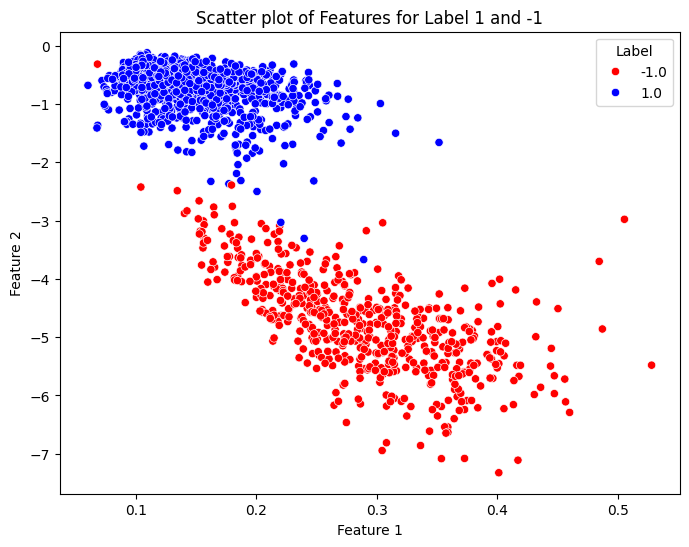

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))

# Plot the data points, colored by label
sns.scatterplot(x='Feature_1', y='Feature2', hue='Label', data=train_data, palette={1: 'blue', -1: 'red'})

# Add labels and title
plt.title('Scatter plot of Features for Label 1 and -1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Show the plot
plt.show()


Based on the above diagram, I can make the following predictions that we can distinguish a line to seperate the data. Of course there are some outliers, but as long as our model does not overfit, it should be fine.

Since the number of outliers are very small compared to the dataset size, I could say that the training data is seperable and the training error will be very low.

Also we can see that there are some points close to the (imaginary) boundary i.e. the support vectors, however they are small n number.

In [7]:
#Read the test data

test_data = pd.read_csv('features.test', sep='\s+', header=None)
test_data.rename(columns={0: 'Label', 1: 'Feature_1', 2: 'Feature2'}, inplace=True)
test_data.head()

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/mc/jb8s7cq1367dsr5fbqvwrdvm0000gn/T/ipykernel_27328/671859803.py:3: SyntaxWarning: invalid escape sequence '\s'
  test_data = pd.read_csv('features.test', sep='\s+', header=None)


,Label,Feature_1,Feature2
0,9.0,0.272178,-4.847937
1,6.0,0.265133,-5.102000
2,3.0,0.335926,-2.921562
3,6.0,0.264850,-4.156625
4,6.0,0.345338,-6.718438


In [8]:
test_data = test_data[(test_data['Label'] == 1) | (test_data['Label'] == 5)]
test_data['Label'].replace(5, -1, inplace=True)
X_test = test_data.iloc[:, 1:3]
y_test = test_data.iloc[:, 0:1]

print(X_test.shape)
print(y_test.shape)

(424, 2)
(424, 1)


/var/folders/mc/jb8s7cq1367dsr5fbqvwrdvm0000gn/T/ipykernel_27328/2354071296.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['Label'].replace(5, -1, inplace=True)


### Part (a)

In [9]:
#Create a linear kernel to train on the SVM model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

In [10]:
#Use the predict function to find the predictions that our model made on the test dataset
predictions = clf.predict(X_test)
print(predictions)

[ 1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1. -1. -1.  1. -1.  1.
 -1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.  1. -1.  1. -1. -1. -1.
  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1. -1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
 -1. -1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1.  1.  1.
  1.  1.  1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1.  1. -1.  1. -1.
  1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1.
  1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1. -1.  1.  1.  1.  1.  1. -1.
 -1.  1.  1.  1. -1. -1. -1.  1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.
 -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.
  1. -1. -1. -1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1. -1. -1.  1. -1.
  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1. -1. -1.  1. -1.
 -1.  1. -1.  1. -1.  1.  1. -1.  1.  1. -1. -1. -1

In [11]:
#Calculate the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy}')

#Find the number of support vectors
support_vector = clf.n_support_
print(f'The support vectors on either side of the hyperplane is : {support_vector}')
num_of_support_vectors = sum(clf.n_support_)
print(f'The number of support vectors is {num_of_support_vectors}')

Accuracy: 0.9787735849056604
The support vectors on either side of the hyperplane is : [14 14]
The number of support vectors is 28


The testing accuracy of 97.88% indicates that the model generalizes well to unseen data, signifying effective training on the provided dataset. Also, the low number of support vectors (28 in total, 14 on either side of the hyperplane) suggests that the model has efficiently captured the decision boundary with minimal support, which is desirable in an SVM model.

A lower number of support vectors generally means a clearer separation between the classes, as the model needs fewer data points to define the decision boundary. This, along with the high accuracy, implies that the dataset is likely well-suited for linear separation.

In conclusion, the model's high accuracy and minimal reliance on support vectors demonstrate that the linear SVM is an effective classifier for this binary classification task, showing both strong predictive performance and simplicity in terms of decision-making complexity.

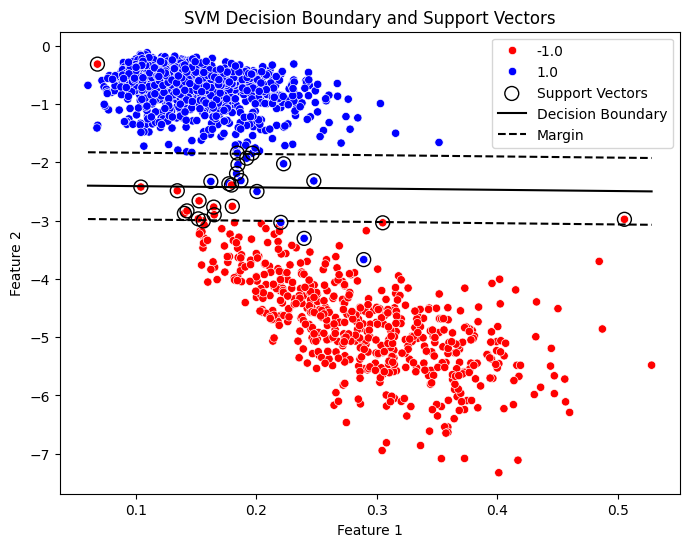

In [12]:
# Plot the data points
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature2', hue='Label', data=train_data, palette={1: 'blue', -1: 'red'})

# Plot the support vectors
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Create the decision boundary
# Get the separating hyperplane
w = clf.coef_[0]
b = clf.intercept_[0]

# Calculate the slope and intercept of the line
slope = -w[0] / w[1]
intercept = -b / w[1]

# Generate x values for plotting the decision boundary
x_vals = np.linspace(X_train['Feature_1'].min(), X_train['Feature_1'].max(), 100)
# Calculate corresponding y values for the decision boundary
y_vals = slope * x_vals + intercept

# Plot the decision boundary
plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')

# Plot the margins (lines parallel to the decision boundary)
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))  # margin distance
plt.plot(x_vals, y_vals - margin, 'k--', label='Margin')
plt.plot(x_vals, y_vals + margin, 'k--')

# Add labels and title
plt.title('SVM Decision Boundary and Support Vectors')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Show the plot
plt.show()


### Part(b)

In [13]:
#Train the data on the subset as specified in the question
num_of_train_data = [50, 100, 200, 800]

for size in num_of_train_data:
    new_X_train = X_train[0:size]
    new_y_train = y_train[0:size]

    #Train the model on the lienar kernel
    new_clf = svm.SVC(kernel='linear')
    new_clf.fit(new_X_train, new_y_train)
    new_predictions = new_clf.predict(X_test)

    new_accuracy = accuracy_score(y_test, new_predictions)
    print(f'While training of dataset of size: {size}, Accuracy: {new_accuracy}')
    num_of_support_vectors = sum(new_clf.n_support_)
    print(f'The number of support vectors is {num_of_support_vectors}\n\n')

While training of dataset of size: 50, Accuracy: 0.9811320754716981
The number of support vectors is 2


While training of dataset of size: 100, Accuracy: 0.9811320754716981
The number of support vectors is 4


While training of dataset of size: 200, Accuracy: 0.9811320754716981
The number of support vectors is 8


While training of dataset of size: 800, Accuracy: 0.9811320754716981
The number of support vectors is 14




/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

Above we can see that the accuracy for the first 50, 10, 200, 800 points are all the same. However the number of support vectors increases.

The reason for same accuracy could be that it is very much linearly seperable.This means that even with a smaller number of training points (like 50 or 100), the SVM is able to find a decision boundary that effectively separates the two classes. 

Since the test data lies close to the same decision boundary, adding more data does not significantly change the model's ability to generalize, hence the accuracy remains high and consistent.

As the training set size increases, the number of support vectors naturally increases because the model is exposed to more data points near the decision boundary. Although the decision boundary does not drastically change (hence the similar accuracy), the SVM needs more support vectors as the training set grows to ensure the boundary remains well-defined.

SVM's margin-maximizing property leads it to adjust the boundary to accommodate new support vectors, but if the data is linearly separable (or close), the general accuracy remains largely unaffected.

### Part(c)

First computing the required values for Q = 2 case

In [14]:
Q = 2
C = [0.0001, 0.001, 0.01, 1]

for val in C:
    clf = svm.SVC(C=val, kernel='poly', degree=Q, coef0=1, gamma=1)
    clf.fit(X_train, y_train)

    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f'While training of dataset on C = {val}, testing error: {1 - test_accuracy}')
    
    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f'While training of dataset on C =  {val}, training Error: {1 - train_accuracy}')
    
    num_of_support_vectors = sum(clf.n_support_)
    print(f'While training of dataset on C =  {val}, the number of support vectors is {num_of_support_vectors}\n\n')

While training of dataset on C = 0.0001, testing error: 0.01650943396226412
While training of dataset on C =  0.0001, training Error: 0.008968609865470878
While training of dataset on C =  0.0001, the number of support vectors is 236


While training of dataset on C = 0.001, testing error: 0.01650943396226412
While training of dataset on C =  0.001, training Error: 0.004484304932735439
While training of dataset on C =  0.001, the number of support vectors is 76


While training of dataset on C = 0.01, testing error: 0.018867924528301883
While training of dataset on C =  0.01, training Error: 0.004484304932735439
While training of dataset on C =  0.01, the number of support vectors is 34


While training of dataset on C = 1, testing error: 0.018867924528301883
While training of dataset on C =  1, training Error: 0.0032030749519538215
While training of dataset on C =  1, the number of support vectors is 24




/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

In [15]:
Q = 5
C = [0.0001, 0.001, 0.01, 1]

for val in C:
    clf = svm.SVC(C=val, kernel='poly', degree=Q, coef0=1, gamma=1)
    clf.fit(X_train, y_train)

    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f'While training of dataset on C = {val}, testing error: {1 - test_accuracy}')
    
    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f'While training of dataset on C =  {val}, training Error: {1 - train_accuracy}')
    
    num_of_support_vectors = sum(clf.n_support_)
    print(f'While training of dataset on C =  {val}, the number of support vectors is {num_of_support_vectors}\n\n')

/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

While training of dataset on C = 0.0001, testing error: 0.018867924528301883
While training of dataset on C =  0.0001, training Error: 0.004484304932735439
While training of dataset on C =  0.0001, the number of support vectors is 26


While training of dataset on C = 0.001, testing error: 0.021226415094339646
While training of dataset on C =  0.001, training Error: 0.004484304932735439
While training of dataset on C =  0.001, the number of support vectors is 25


While training of dataset on C = 0.01, testing error: 0.021226415094339646
While training of dataset on C =  0.01, training Error: 0.0038436899423446302
While training of dataset on C =  0.01, the number of support vectors is 23


While training of dataset on C = 1, testing error: 0.021226415094339646
While training of dataset on C =  1, training Error: 0.0032030749519538215
While training of dataset on C =  1, the number of support vectors is 21




Explainaning the above results:

When C is very small, the SVM model is highly regularized. Model prioritizes maximizing the margin, even if it misclassifies some training points. The relatively higher number of support vectors indicates that more training points are near the margin and are influencing the decision boundary.

Despite this regularization, the training error is quite low (0.00448) because the data is well-separated, but the model still allows some misclassifications to ensure the margin is wide.

 As C increases, the model allows fewer training points to be on the wrong side of the margin, becoming less regularized and trying to fit the training data better. This is why the training error decreases. A smaller number of support vectors means fewer points are directly influencing the decision boundary, which suggests a tighter fit to the training data.

 Interestingly, while the training error decreases as C increases, the testing error remains nearly the same. This suggests that the model’s generalization performance is stable and that it isn't overfitting as C increases.

### Part(d)

In [16]:
clf = svm.SVC(kernel='rbf')
C = [0.01, 1, 100, 1e4, 1e6]

for val in C:
    clf = svm.SVC(C=val, kernel='rbf', gamma=1)
    clf.fit(X_train, y_train)

    test_predictions = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    print(f'While training of dataset on C = {val}, Testing Error: {1 - test_accuracy}')
    
    train_predictions = clf.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_predictions)
    print(f'While training of dataset on C = {val}, Training Error: {1 - train_accuracy}')
    
    num_of_support_vectors = sum(clf.n_support_)
    print(f'While training of dataset on C = {val}, The number of support vectors is {num_of_support_vectors}\n\n')

While training of dataset on C = 0.01, Testing Error: 0.02358490566037741
While training of dataset on C = 0.01, Training Error: 0.0038436899423446302
While training of dataset on C = 0.01, The number of support vectors is 406


While training of dataset on C = 1, Testing Error: 0.021226415094339646
While training of dataset on C = 1, Training Error: 0.004484304932735439
While training of dataset on C = 1, The number of support vectors is 31


While training of dataset on C = 100, Testing Error: 0.018867924528301883
While training of dataset on C = 100, Training Error: 0.0032030749519538215
While training of dataset on C = 100, The number of support vectors is 22


While training of dataset on C = 10000.0, Testing Error: 0.02358490566037741
While training of dataset on C = 10000.0, Training Error: 0.002562459961563124
While training of dataset on C = 10000.0, The number of support vectors is 19




/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/cwq/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

While training of dataset on C = 1000000.0, Testing Error: 0.02358490566037741
While training of dataset on C = 1000000.0, Training Error: 0.0006406149903908087
While training of dataset on C = 1000000.0, The number of support vectors is 17




Analyzing the above results
The best performance seems to occur around C=100, which provides a good balance between training and testing error. The model appears to generalize well without being overly complex.  

Increasing C to high values leads to lower training errors but fails to improve (and sometimes worsens) testing errors, indicating overfitting.  

The trend of decreasing support vectors with increasing C (up to a point) suggests that the model is becoming more selective about which points define the decision boundary, which is generally a positive outcome for generalization.